# Explore here

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Obtener las dimensiones
df.shape
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
import pandas as pd
import importlib
import myEDA.MyEDA as myEDA  #creacion de un paquete que realiza el EDA automaticamente.
#from myEDA import MyEDA
importlib.reload(myEDA)

# Simulación de un DataFrame con una fila duplicada

categorical, numerical, df = myEDA.MyEDA.explore(df)



Rows (before cleanup): 3140
Columns: 108

+----------+----------------+------------+-----------+---------------+
|          | Non-Null Count | Null Count | Data Type | Data Category |
+----------+----------------+------------+-----------+---------------+
| fips     |           3140 |          0 |     int64 |       Numeric |
| TOT_POP  |           3140 |          0 |     int64 |       Numeric |
| 0-9      |           3140 |          0 |     int64 |       Numeric |
| 0-9 y/o % of total pop |           3140 |          0 |   float64 |       Numeric |
| 19-Oct   |           3140 |          0 |     int64 |       Numeric |
| 10-19 y/o % of total pop |           3140 |          0 |   float64 |       Numeric |
| 20-29    |           3140 |          0 |     int64 |       Numeric |
| 20-29 y/o % of total pop |           3140 |          0 |   float64 |       Numeric |
| 30-39    |           3140 |          0 |     int64 |       Numeric |
| 30-39 y/o % of total pop |           3140 |          0 | 

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
print("Categorical variables:", categorical)
print("Numerical variables:", numerical)

Categorical variables: ['COUNTY_NAME', 'STATE_NAME']
Numerical variables: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 20

Variables Relevantes para el EDA
Variables Socio-demográficas (Factores de riesgo y determinantes sociales de la salud)

TOT_POP → Población total del condado.  
% White-alone, % Black-alone, % NA/AI-alone, % Asian-alone, % Hawaiian/PI-alone, % Two or more races → Composición racial, importante para desigualdades en salud.  
Median_Household_Income_2018 → Nivel socioeconómico, influye en acceso a salud.  
PCTPOVALL_2018 → % de la población en pobreza, asociado con peores resultados de salud.  
Unemployment_rate_2018 → Desempleo, indicador de estabilidad económica y acceso a seguro médico.  
Education Variables (e.g., "Percent of adults with a bachelor's degree or higher 2014-18") → La educación influye en hábitos de salud y uso del sistema sanitario.  
Urban_rural_code → Diferencias entre zonas urbanas y rurales en acceso a recursos de salud.  


Variables de Recursos de Salud (Disponibilidad de atención médica)  

Active Physicians per 100000 Population 2018 → Número de médicos por habitantes.  
Total Active Patient Care Physicians per 100000 Population → Médicos en atención directa.  
Active Primary Care Physicians per 100000 Population → Acceso a médicos de atención primaria.  
Active General Surgeons per 100000 Population → Disponibilidad de cirugía.  
Total Hospitals (2019) → Cantidad de hospitales en el condado.  
ICU Beds_x → Camas de UCI disponibles, clave en enfermedades cardíacas.  


Variables de Salud (Factores de Riesgo y Otras Condiciones)  

Obesity_prevalence → Relacionada con enfermedades cardíacas.  
diabetes_prevalence → Factor de riesgo importante.  
COPD_prevalence → Enfermedades respiratorias pueden impactar enfermedades cardiovasculares.  

Variable Objetivo (Relacionada con Salud)  
Para el análisis, podemos elegir una variable de salud que refleje la calidad del sistema sanitario. Algunas opciones:  

Obesity_prevalence → Relacionada con enfermedades metabólicas y acceso a atención preventiva.  
Heart disease_prevalence → Indicador clave de salud pública y acceso a cardiología.  
Active Physicians per 100000 Population → Refleja el acceso general a médicos.  

Selección: "Heart disease_prevalence" (prevalencia de enfermedades cardíacas), ya que es una condición de alta relevancia y está influenciada tanto por el acceso a la atención médica como por factores socio-demográficos.  

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas relevantes
selected_columns = ['TOT_POP', '% White-alone',  '% Black-alone',  '% NA/AI-alone',  '% Asian-alone',  '% Hawaiian/PI-alone',  '% Two or more races',
                    'Median_Household_Income_2018',  'PCTPOVALL_2018', 'Unemployment_rate_2018', 'Percent of adults with less than a high school diploma 2014-18',
                    'Percent of adults with a high school diploma only 2014-18',  "Percent of adults completing some college or associate's degree 2014-18",
                    "Percent of adults with a bachelor's degree or higher 2014-18", 'Urban_rural_code', 
                    'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 
                    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)',
                    'Total Hospitals (2019)',  'ICU Beds_x',  'Obesity_prevalence','diabetes_prevalence',  'Heart disease_prevalence','COPD_prevalence']


# Crear un nuevo DataFrame con las columnas seleccionadas
df_selected = df[selected_columns]

# Mostrar las primeras filas del nuevo DataFrame
df_selected.head()


,TOT_POP,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Median_Household_Income_2018,PCTPOVALL_2018,Unemployment_rate_2018,...,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Total Hospitals (2019),ICU Beds_x,Obesity_prevalence,diabetes_prevalence,Heart disease_prevalence,COPD_prevalence
0,55601,76.725239,19.630942,0.480207,1.224798,0.111509,1.827305,59338,13.8,3.6,...,217.1,196.7,77.2,7.6,1.148905,6,35.8,12.9,7.9,8.6
1,218022,87.285228,8.940382,0.772399,1.150343,0.066966,1.784682,57588,9.8,3.6,...,217.1,196.7,77.2,7.6,4.505074,51,29.7,12.0,7.8,8.6
2,24881,49.069571,48.398376,0.659137,0.454162,0.184880,1.233873,34382,30.9,5.2,...,217.1,196.7,77.2,7.6,0.514126,5,40.7,19.7,11.0,12.1
3,22400,76.834821,21.294643,0.437500,0.236607,0.116071,1.080357,46064,21.8,4.0,...,217.1,196.7,77.2,7.6,0.462860,0,38.7,14.1,8.6,10.0
4,57840,95.878285,1.642462,0.653527,0.319848,0.121024,1.384855,50412,13.2,3.5,...,217.1,196.7,77.2,7.6,1.195171,6,34.0,13.5,9.2,10.5


In [8]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 25 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  3140 non-null   int64  
 1   % White-alone                                                            3140 non-null   float64
 2   % Black-alone                                                            3140 non-null   float64
 3   % NA/AI-alone                                                            3140 non-null   float64
 4   % Asian-alone                                                            3140 non-null   float64
 5   % Hawaiian/PI-alone                                                      3140 non-null   float64
 6   % Two or more races                                                     

In [23]:
# Verificar que selected_columns contenga nombres de columnas numéricas

selected_columns = df_selected.select_dtypes(include=['number']).columns.tolist()
print(selected_columns) 


['TOT_POP', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Median_Household_Income_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'Urban_rural_code', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Total Hospitals (2019)', 'ICU Beds_x', 'Obesity_prevalence', 'diabetes_prevalence', 'Heart disease_prevalence', 'COPD_prevalence']


In [10]:
# Verificar que df_selected no está vacío y tiene datos
if df_selected.empty:
    raise ValueError("El DataFrame df_selected está vacío.")

if df_selected.shape[1] < 2:
    raise ValueError("El DataFrame no tiene suficientes columnas numéricas para calcular la correlación.")


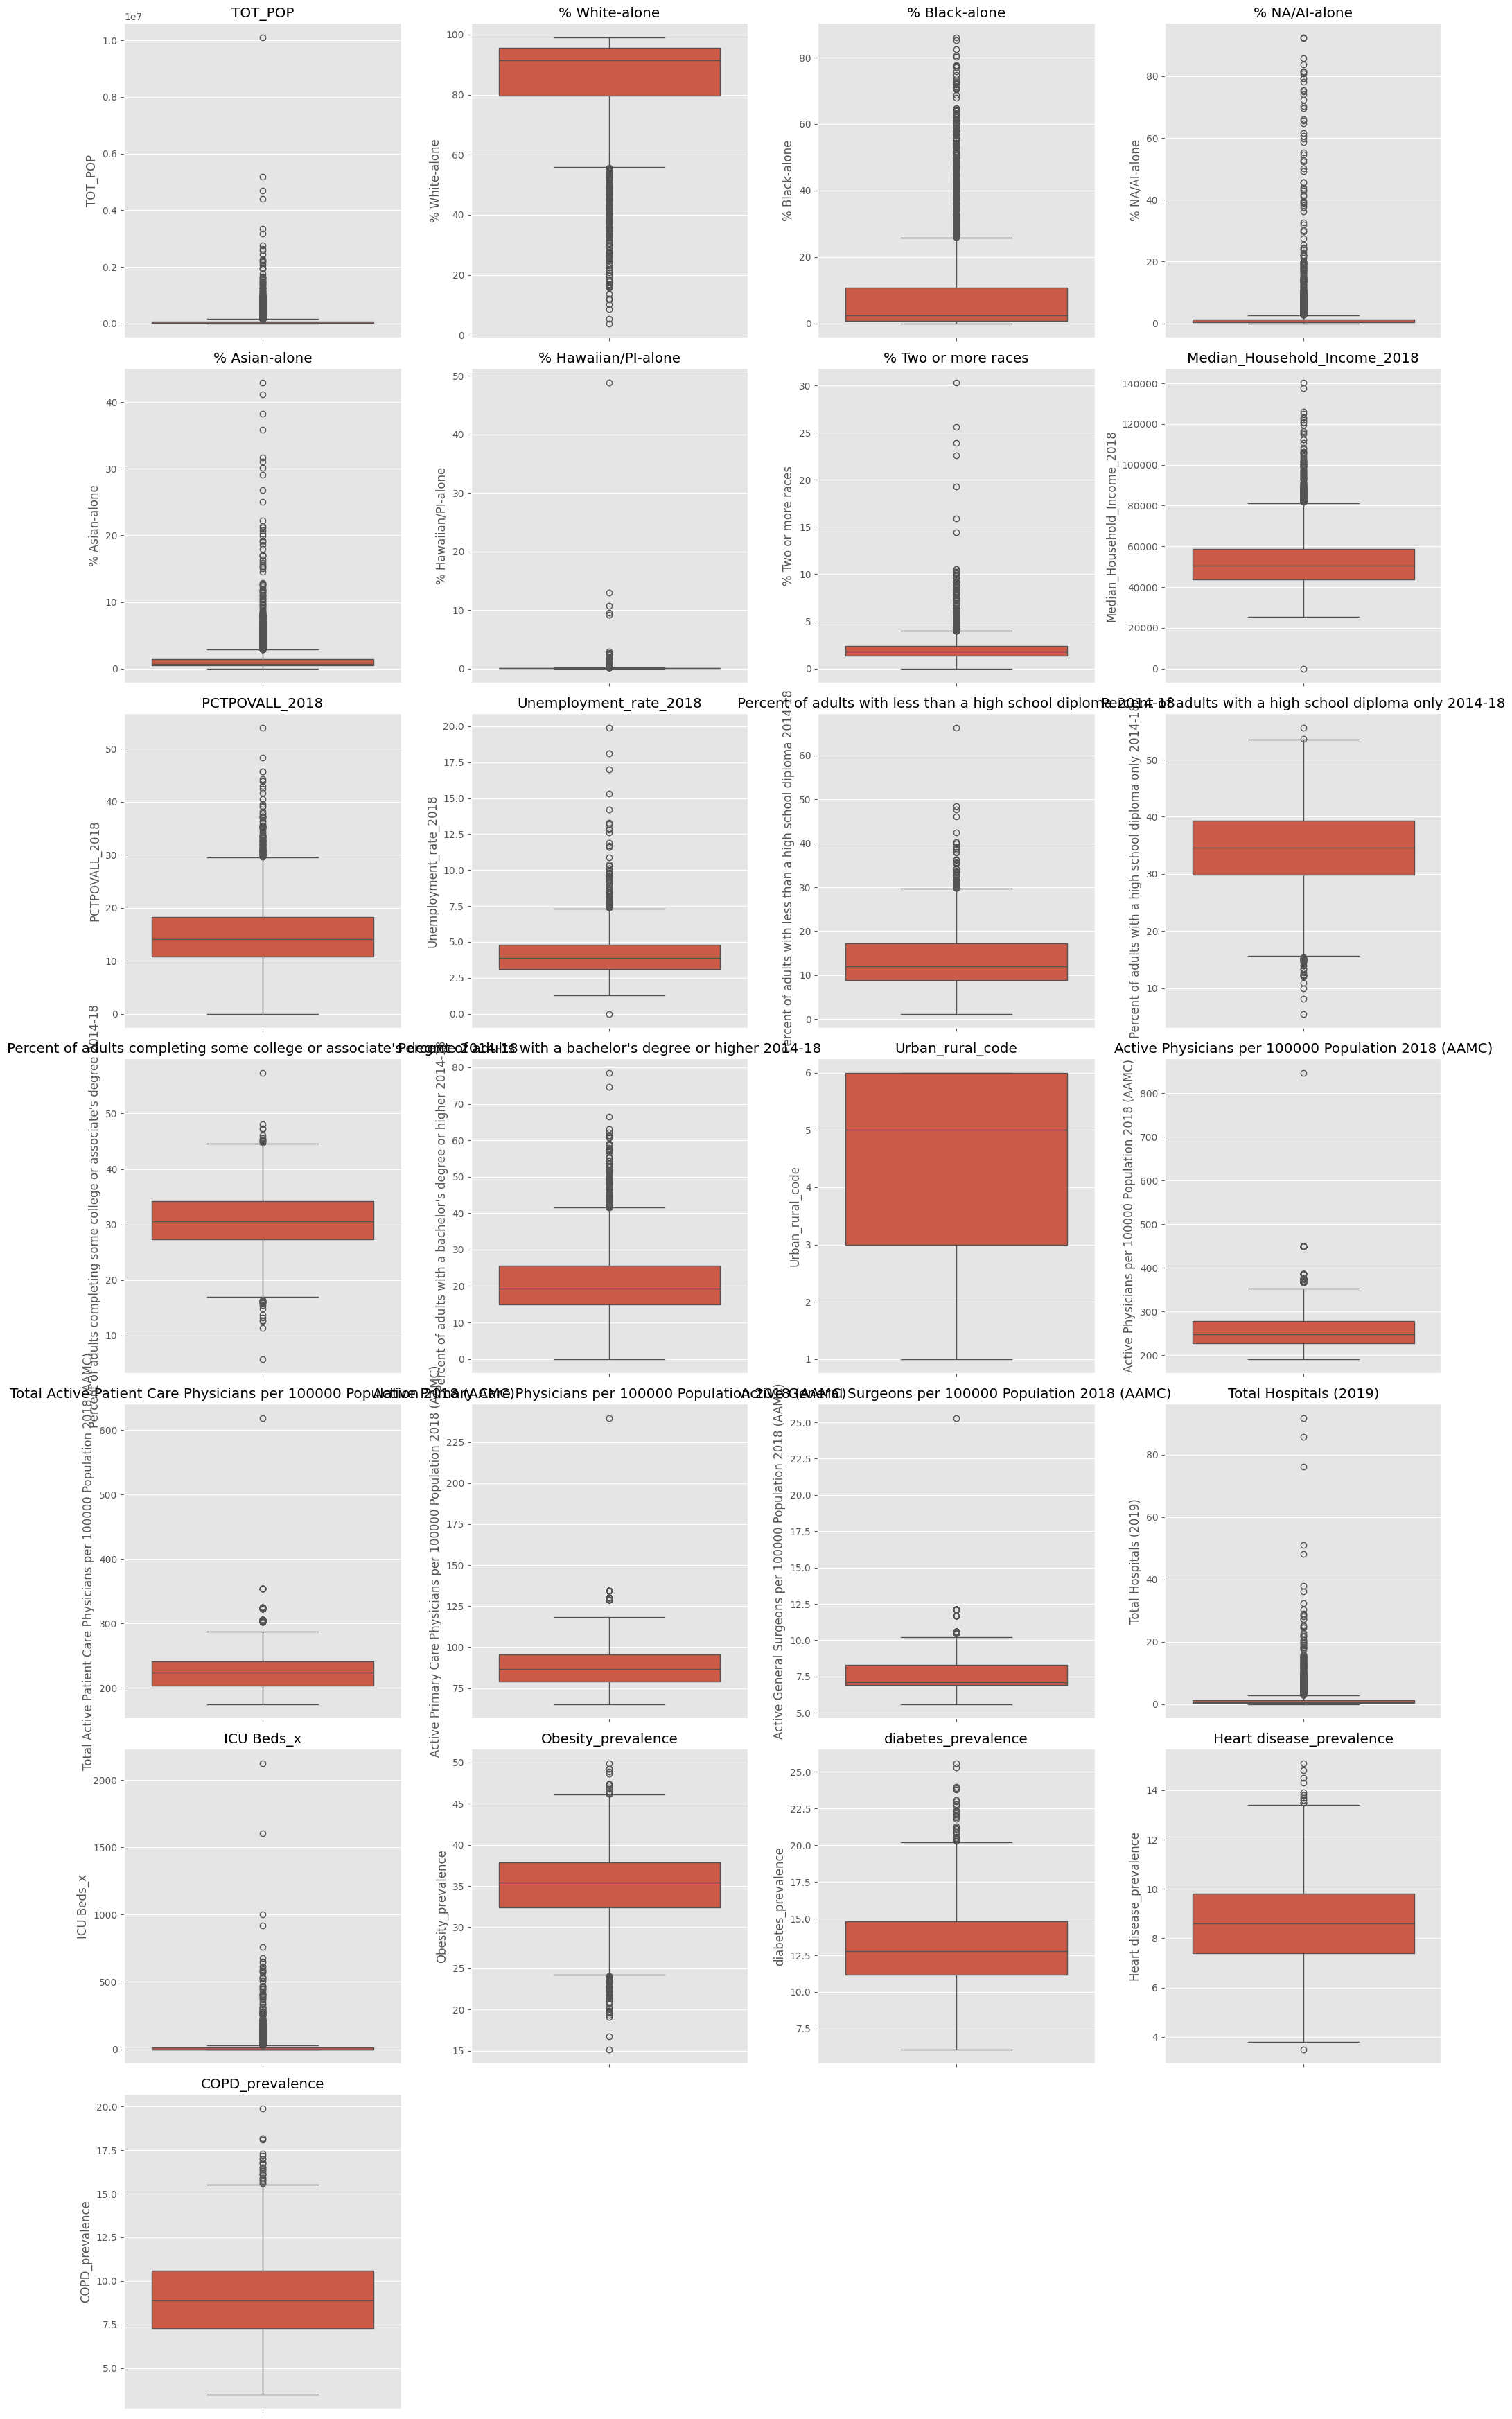

In [11]:
import math

# Obtener el número de columnas a graficar
num_plots = len(selected_columns)

# Definir el número de filas y columnas de manera dinámica
num_cols = 4  # Número fijo de columnas
num_rows = math.ceil(num_plots / num_cols)  # Calculamos el número de filas necesarias

plt.figure(figsize=(20, 5 * num_rows))  # Ajustamos el tamaño según el número de filas

# Subplots de box plots para cada columna
for i, column in enumerate(selected_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_selected[column])
    plt.title(column)

plt.tight_layout()
plt.show()

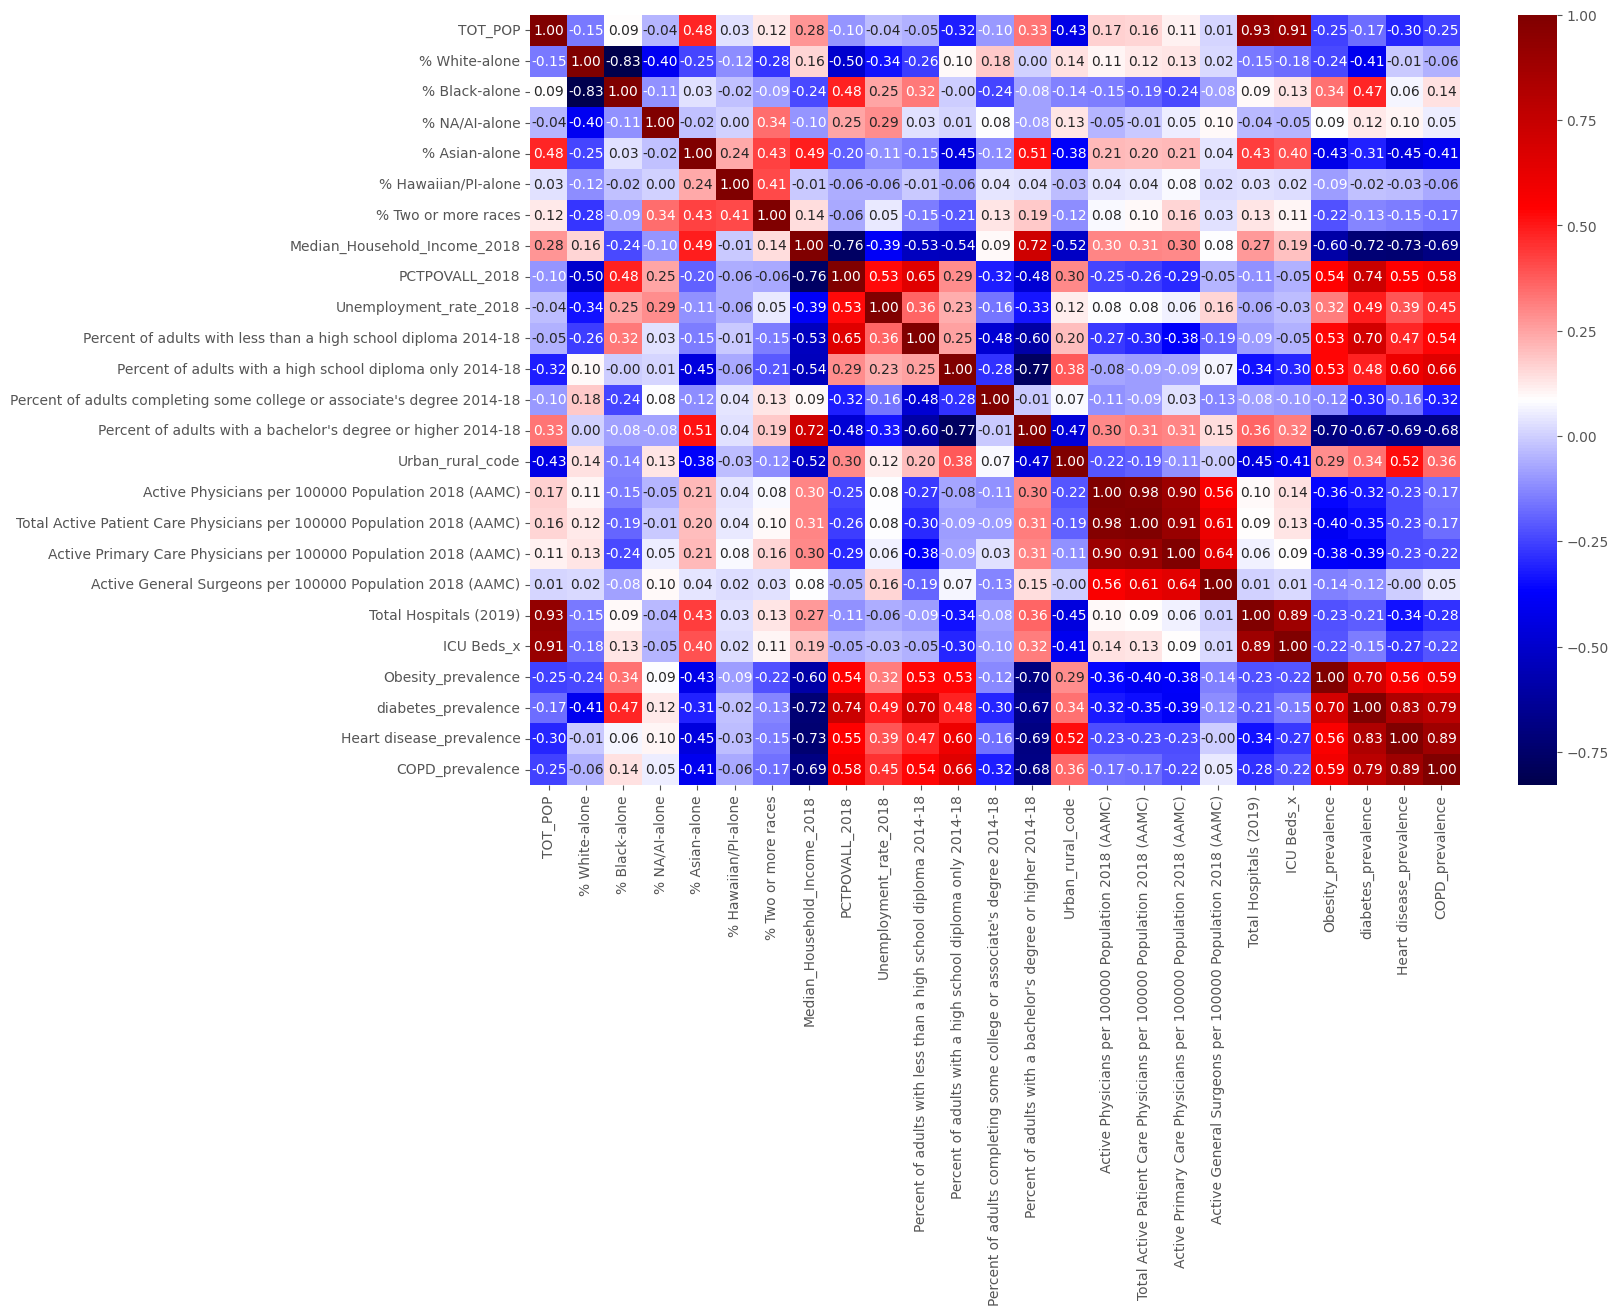

In [ ]:
# Crear la tabla de correlación
correlation_matrix = df_selected.corr()

# Mostrar la tabla de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap="seismic")
Relaciones Fuertes entre Recursos de Saludplt.show()

Relaciones Fuertes entre Recursos de Salud: 

Active Physicians per 100k Vs Total Active Patient Care Physicians per 100k	0.98	Más médicos totales significan más médicos en atención directa.  
TOT_POP  Vs	Total Hospitals (2019)	0.93	Condados más poblados tienen más hospitales.   
Total Active Patient Care Physicians per 100k  Vs Active Primary Care Physicians per 100k	0.91	La cantidad total de médicos está relacionada con la cantidad de médicos generales.  
TOT_POP Vs	ICU Beds_x	0.91	Más población significa más camas de UCI en los hospitales.  
Active Physicians per 100k	 Vs Active Primary Care Physicians per 100k	0.89	Más médicos en general implica más médicos de atención primaria.  
Total Hospitals (2019) Vs	ICU Beds_x	0.88	Más hospitales significa más camas de UCI.    

Relaciones Fuertes entre Enfermedades:   

Heart disease_prevalence  Vs COPD_prevalence	0.89	Las enfermedades cardíacas y la EPOC (Enfermedad Pulmonar Obstructiva Crónica) suelen ir juntas.  
diabetes_prevalence	 Vs Heart disease_prevalence	0.83	La diabetes es un factor de riesgo importante para enfermedades cardíacas.   
diabetes_prevalence	 Vs COPD_prevalence	0.79	La diabetes y la EPOC también están relacionadas, posiblemente por factores de estilo de vida.     

Factores Socioeconómicos y su Relación con la Salud:  

Median_Household_Income_2018    Obesity_prevalence  -0,6  
Median_Household_Income_2018	diabetes_prevalence	-0.72	  
Median_Household_Income_2018	Heart disease_prevalence	-0.73	  
Ingresos más altos se asocian con menos enfermedades cardiacas, de obesidad o diabetes.   

PCTPOVALL_2018 (porcentaje de pobreza) Vs diabetes_prevalence		0.73	Los condados con más pobreza tienden a tener más diabetes.    
PCTPOVALL_2018 (porcentaje de pobreza) Vs Median_Household_Income_2018	-0.76	Como era de esperar, donde hay más pobreza, los ingresos son más bajos.    
Percent of adults with a high school diploma only Vs Percent of adults with a bachelor's degree	-0.77	Menos educación universitaria significa más personas con solo secundaria.    



Modelo Regresión Lineal con las columnas seleccionadas

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Crear un nuevo DataFrame con las columnas seleccionadas
data_selected = df_selected[selected_columns]

# Seleccionar variables dependientes e independientes
X = data_selected.drop(columns=['Heart disease_prevalence'])
y = data_selected['Heart disease_prevalence']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 1292 to 860
Data columns (total 24 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  2512 non-null   int64  
 1   % White-alone                                                            2512 non-null   float64
 2   % Black-alone                                                            2512 non-null   float64
 3   % NA/AI-alone                                                            2512 non-null   float64
 4   % Asian-alone                                                            2512 non-null   float64
 5   % Hawaiian/PI-alone                                                      2512 non-null   float64
 6   % Two or more races                                                      25

In [ ]:
#NORMALIZACIÓN DATOS
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

num_variables= ['TOT_POP', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Median_Household_Income_2018', 'PCTPOVALL_2018', 'Unemployment_rate_2018', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'Urban_rural_code', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Total Hospitals (2019)', 'ICU Beds_x', 'Obesity_prevalence', 'diabetes_prevalence', 'COPD_prevalence']

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)   #Convierte la matriz escalada en un DataFrame con los mismos índices y nombres de columnas

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)
X_train_scal.head()

,TOT_POP,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,% Two or more races,Median_Household_Income_2018,PCTPOVALL_2018,Unemployment_rate_2018,...,Urban_rural_code,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Total Hospitals (2019),ICU Beds_x,Obesity_prevalence,diabetes_prevalence,COPD_prevalence
1292,0.002626,0.957623,0.014706,0.017376,0.007782,0.000846,0.065656,0.358835,0.287037,0.429577,...,1.0,0.145951,0.168618,0.186353,0.116751,0.004167,0.000000,0.674352,0.395833,0.475610
2302,0.005064,0.976818,0.013439,0.002298,0.010490,0.000878,0.049507,0.325975,0.277778,0.345070,...,0.8,0.197041,0.221747,0.203555,0.157360,0.008671,0.003763,0.518732,0.364583,0.390244
761,0.003730,0.938718,0.044132,0.003863,0.024281,0.000975,0.056830,0.389779,0.225926,0.267606,...,0.2,0.060241,0.083746,0.086009,0.045685,0.008111,0.002822,0.533141,0.317708,0.347561
2194,0.009094,0.746091,0.014841,0.145748,0.034675,0.001758,0.329109,0.440576,0.181481,0.232394,...,0.4,0.023486,0.032193,0.049312,0.030457,0.031781,0.002822,0.613833,0.265625,0.280488
1241,0.013300,0.812971,0.129621,0.008415,0.069696,0.000928,0.137281,0.344866,0.320370,0.295775,...,0.6,0.145951,0.168618,0.186353,0.116751,0.021110,0.015052,0.642651,0.333333,0.371951


In [28]:
# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las mejores características para regresión
k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(f_regression, k=k)
selection_model.fit(X_train_scal, y_train)

# Obtener las características seleccionadas
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()
X_train_sel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 7 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Median_Household_Income_2018                                  2512 non-null   float64
 1   PCTPOVALL_2018                                                2512 non-null   float64
 2   Percent of adults with a high school diploma only 2014-18     2512 non-null   float64
 3   Percent of adults with a bachelor's degree or higher 2014-18  2512 non-null   float64
 4   Obesity_prevalence                                            2512 non-null   float64
 5   diabetes_prevalence                                           2512 non-null   float64
 6   COPD_prevalence                                               2512 non-null   float64
dtypes: float64(7)
memory usage: 137.5 KB


In [ ]:
#Agregamos las etiquetas de entrenamiento (y_train) y prueba (y_test) como una nueva columna en los dataframes X_train_sel y X_test_sel, respectivamente
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

#Guardamos los dataframes en formato .csv para usarlos posteriormente en el modelo de machine learning
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

'''
@Laura-Cruz-Gil ➜ /workspaces/LC-Regresion-Lineal-Regularizada/data/processed (main) $ ls -lrt
total 132
-rw-rw-rw- 1 vscode vscode 103837 Mar  2 22:25 clean_train.csv
-rw-rw-rw- 1 vscode vscode  26156 Mar  2 22:25 clean_test.csv
@Laura-Cruz-Gil ➜ /workspaces/LC-Regresion-Lineal-Regularizada/data/processed (main) $ 
'''



Modelo de regresión logística


In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

# TRAIN MODEL 
train_data.head()

,Median_Household_Income_2018,PCTPOVALL_2018,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Obesity_prevalence,diabetes_prevalence,COPD_prevalence,Heart disease_number
0,50374.0,15.5,35.4,18.8,38.6,13.7,11.3,10.1
1,45761.0,15.0,48.4,17.6,33.2,13.1,9.9,9.2
2,54718.0,12.2,43.8,16.1,33.7,12.2,9.2,7.3
3,61849.0,9.8,32.8,24.3,36.5,11.2,8.1,7.8
4,48413.0,17.3,36.4,21.2,37.5,12.5,9.6,8.4


In [34]:
# TRAIN MODEL 

X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

y_train.head()

0    10.1
1     9.2
2     7.3
3     7.8
4     8.4
Name: Heart disease_number, dtype: float64

 2. Inicialización y entrenamiento del modelo

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [36]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 5.661153753896796
Coefficients: [-3.79550959e-05 -8.09117844e-02  2.23121662e-03  8.49009548e-05
 -4.58097710e-02  3.14698254e-01  3.93635367e-01]


In [37]:
# Predicciones
y_pred = model.predict(X_test)
y_pred

array([ 9.40781597,  6.2530267 , 12.52161758,  7.99581485,  6.32531772,
        6.64197292,  7.73364197, 11.94589948,  8.53262157,  5.63167036,
        7.91094956, 11.69740985,  6.07537842, 10.26387067,  7.13757477,
        8.86221694,  8.28976341,  9.0115391 , 10.32758744,  8.40386718,
        9.90086045,  8.76222106,  8.20677877,  9.8433527 ,  7.00414506,
        6.22726331,  4.89832673,  7.86956051,  7.74824344,  8.76096018,
       12.03036974,  8.93323368, 10.16337373,  9.1780049 ,  6.99037762,
       10.99436934,  9.30066913,  6.987832  ,  8.3344354 ,  6.07367793,
       10.19157653,  7.14500789,  7.89703351,  8.24853746,  7.19689023,
       10.51898969,  9.28860079,  9.47601181, 10.8041801 , 12.87484956,
       10.19561014, 13.45649054,  7.40752069,  9.82855387,  8.2530149 ,
       10.37592563,  7.49325362,  6.62355835,  9.42059278,  8.6696123 ,
        5.7271325 ,  9.36533007,  8.90690158,  6.50649139,  8.19725887,
        6.80932668,  7.79086092,  9.29059084,  9.28269661,  7.44

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.37737935434594444
R2 Score: 0.8830271323323471


MODELO LASSO

In [43]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)



Lasso(alpha=1)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Coefficients: [-6.12057428e-05 -0.00000000e+00  1.91491870e-02 -1.26062090e-02
  0.00000000e+00  2.71222780e-02  1.32500086e-01]
R2 score: 0.6965751332524677
MSE: 0.4007683579318915


Conclusión:

El modelo de regresión lineal parece estar ajustando mejor los datos con un mayor R2 Score: 0.8830271323323471  y menor MSE.
El modelo de Lasso es de utilidad para evitar ell sobreajuste, pero en este caso, tiene un rendimiento ligeramente inferior en cuanto a la predicción (R2 score: 0.6965751332524677).